# Chapter 2 - Training Simple Machine Learning Algorithms for Classifcation

# Perceptron

## 0 - Class Perceptron

In [115]:
# -*- coding: utf-8 -*-
import numpy as np

class Perceptron(object):
    """
    Perceptron classifier.

    Parameters
    ------------
    eta : float -> Learning rate (between 0.0 and 1.0).
    n_iter : int -> Number of epochs or samples.
    random_state : int -> Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array -> Weights after fitting.
    errors_ : list -> Number of misclassifications (updates) in each epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
        Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # Iniciação randômica do vetor de pesos.
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):  # xi se refere à cada linha do vetor de amostras X.
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update  # Atualiza o bias.
                self.w_[1:] += update * xi  # Atualiza o restante dos pesos.
                errors += int(update != 0.0)  # Conta +1 se o Perceptron errou a predição.
            self.errors_.append(errors)  # Lista com o valor dos erros, por época.
        return self

    def net_input(self, X):
        """Calculate net input. Produto escalar X.W + bias."""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step."""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## 1 - Iris Dataset

In [116]:
import pandas as pd

df = pd.read_csv('iris_dataset.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


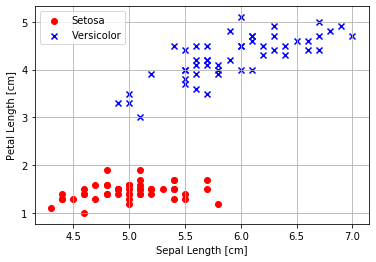

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Select Setosa (-1) and Versicolor (1) flowers.
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Extract sepal_length and petal_length.
X = df.iloc[0:100, [0, 2]].values

# Plot data.
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='Versicolor')

plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## 2 - Training The Perceptron

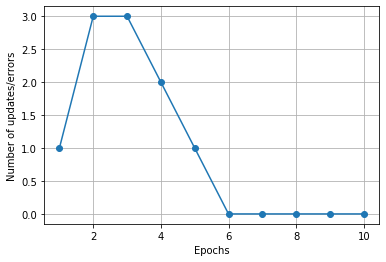

In [118]:
percep = Perceptron(eta=0.1, n_iter=10)

percep.fit(X, y)

plt.plot(range(1, len(percep.errors_) + 1), percep.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates/errors')
plt.grid()
plt.show()

## 3 - Plotting Decision Regions

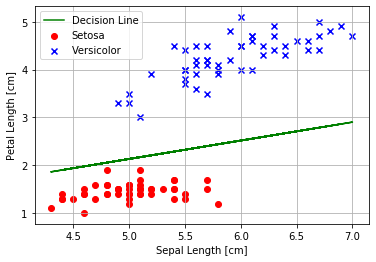

In [119]:
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='Versicolor')
# Decision Line.
DL = -percep.w_[0]/percep.w_[2] - percep.w_[1]/percep.w_[2]*X[:, 0]
plt.plot(X[:, 0], DL,
        color='green', label='Decision Line')

plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Adaptive Linear Neuron (Adaline) with Batch Gradient Descendet


## 0 - Class AdalineGD

In [120]:
# -*- coding: utf-8 -*-
import numpy as np

class AdalineGD(object):
    """
    Adaline with Batch Gradient Descendet classifier.

    Parameters
    ------------
    eta : float -> Learning rate (between 0.0 and 1.0).
    n_iter : int -> Number of epochs or samples.
    random_state : int -> Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array -> Weights after fitting.
    cost_ : list -> Sum-of-squares cost function value in each epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
        Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # Iniciação randômica do vetor de pesos.
        self.cost_ = []

        for i in range(self.n_iter):
            
            net_input = self.net_input(X)  # Vetor com os net_inputs de todas as amostras.
            output = self.activation(net_input)  # Vetor com as respectivas classes preditas.
            errors = (y - output)  # Erros entres as classes preditas e as verdadeiras.
            
            self.w_[0] += self.eta * errors.sum()  # Atualização do bias.
            self.w_[1:] += self.eta * X.T.dot(errors)  # Multiplicação entre a matriz transposta de amostras (X.T)
                                                       # e o vetor coluna de erros (errors).
            cost = (errors**2).sum() / 2.0  # Cálculo da função de custo.
            self.cost_.append(cost)  # Armazena o custo associado a época i.
        return self

    def net_input(self, X):
        """Calculate net input. Produto escalar X.W + bias."""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation."""
        return X
    
    def predict(self, X):
        """Return class label after unit step."""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

## 1 - Training the Adaline

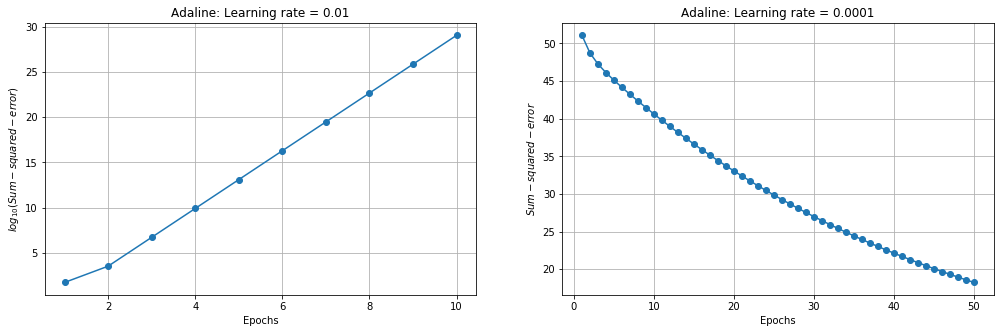

In [121]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))

ada1 = AdalineGD(n_iter=10, eta=0.01)
ada1.fit(X,y)

ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].grid()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('$log_{10}(Sum-squared-error)$')
ax[0].set_title('Adaline: Learning rate = 0.01')

ada2 = AdalineGD(n_iter=50, eta=0.0001)
ada2.fit(X,y)

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].grid()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('$Sum-squared-error$')
ax[1].set_title('Adaline: Learning rate = 0.0001')
plt.show()

## 2 - Plotting Decision Regions

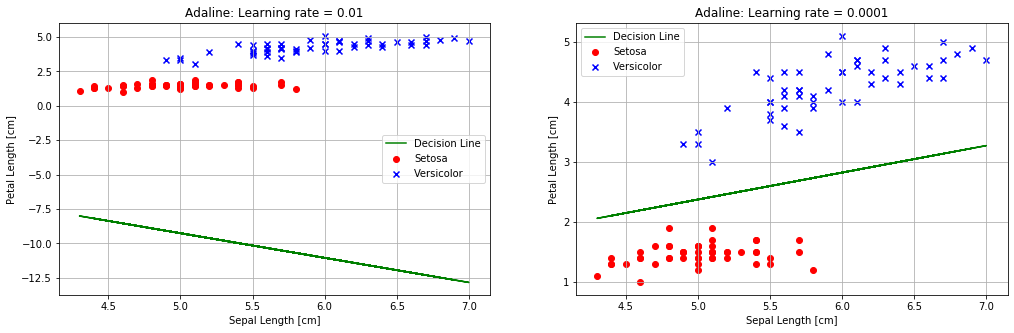

In [122]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))

# Adaline 1. - - - - - - - - - - - - - - - - - - - - - - - - - - - # 
ax[0].scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
ax[0].scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='Versicolor')
ax[0].grid()
ax[0].set_xlabel('Sepal Length [cm]')
ax[0].set_ylabel('Petal Length [cm]')
ax[0].set_title('Adaline: Learning rate = 0.01')
# Decision Line.
DL1 = -ada1.w_[0]/ada1.w_[2] - ada1.w_[1]/ada1.w_[2]*X[:, 0]
ax[0].plot(X[:, 0], DL1,
        color='green', label='Decision Line')
ax[0].legend(loc='center right')

# Adaline 2. - - - - - - - - - - - - - - - - - - - - - - - - - - - # 
ax[1].scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
ax[1].scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='Versicolor')
ax[1].grid()
ax[1].set_xlabel('Sepal Length [cm]')
ax[1].set_ylabel('Petal Length [cm]')
ax[1].set_title('Adaline: Learning rate = 0.0001')
# Decision Line.
DL2 = -ada2.w_[0]/ada2.w_[2] - ada2.w_[1]/ada2.w_[2]*X[:, 0]
ax[1].plot(X[:, 0], DL2,
        color='green', label='Decision Line')
ax[1].legend(loc='upper left')

plt.show()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Adaptive Linear Neuron (Adaline) with Stochastic Gradient Descendet


## 0 - Class AdalineSGD

In [123]:
# -*- coding: utf-8 -*-
import numpy as np

class AdalineSGD(object):
    """
    Adaline with Batch Gradient Descendet classifier.

    Parameters
    ------------
    eta : float -> Learning rate (between 0.0 and 1.0).
    n_iter : int -> Number of epochs or samples.
    shuffle : bool -> (default: True) Shuffles training data every epoch if True to prevent cycles.
    random_state : int -> Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array -> Weights after fitting.
    cost_ : list -> Sum-of-squares cost function value in each epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.random_state = random_state
        self.w_initialized = False

    def fit(self, X, y):
        """
        Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object
        """
        
        self._initialize_weights(X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            
            if self.shuffle:
                X, y = self._shuffle(X, y)  # Embaralha os dados.
                
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
                
            avg_cost = sum(cost) / len(y)  # Custo total, ao final da época.
            self.cost_.append(avg_cost)  # Armazena o custo associado a época i.
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights."""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers."""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)  # Iniciação randômica do vetor de pesos.
        self.w_initialized = True
        
    def _shuffle(self, X, y):
        """Shuffle training data."""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights."""
        net_input = self.net_input(xi)  # Vetor com os net_inputs de todas as amostras.
        output = self.activation(net_input)  # Vetor com as respectivas classes preditas.
        error = (target - output)  # Erros entre as classe preditae e a verdadeira.
        
        self.w_[0] += self.eta * error  # Atualização do bias.
        self.w_[1:] += self.eta * xi.dot(error)  # Multiplicação entre o vetor de features e o de error.

        cost = 0.5 * error**2  # Cálculo da função de custo.
        return cost
    
    def net_input(self, X):
        """Calculate net input. Produto escalar X.W + bias."""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation."""
        return X
    
    def predict(self, X):
        """Return class label after unit step."""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

## 1 - Standardize Features

In [124]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

## 2 - Training and Plotting

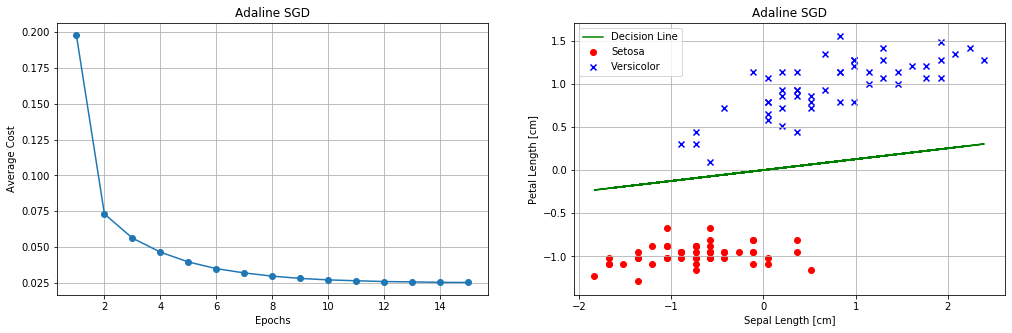

In [125]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))

adaSGD = AdalineSGD(n_iter=15, eta=0.01)
adaSGD.fit(X_std, y)

ax[0].plot(range(1, len(adaSGD.cost_) + 1), adaSGD.cost_, marker='o')
ax[0].grid()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Average Cost')
ax[0].set_title('Adaline SGD')

# Plotting - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
ax[1].scatter(X_std[:50, 0], X_std[:50, 1],
            color='red', marker='o', label='Setosa')
ax[1].scatter(X_std[50:100, 0], X_std[50:100, 1],
            color='blue', marker='x', label='Versicolor')
ax[1].grid()
ax[1].set_xlabel('Sepal Length [cm]')
ax[1].set_ylabel('Petal Length [cm]')
ax[1].set_title('Adaline SGD')
# Decision Line.
DL = -adaSGD.w_[0]/adaSGD.w_[2] - adaSGD.w_[1]/adaSGD.w_[2]*X_std[:, 0]
ax[1].plot(X_std[:, 0], DL,
        color='green', label='Decision Line')
ax[1].legend(loc='upper left')

plt.show()

# References

[Python Machine Learning - Code Examples - Chapter 2](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch02/ch02.ipynb)